135
28 107


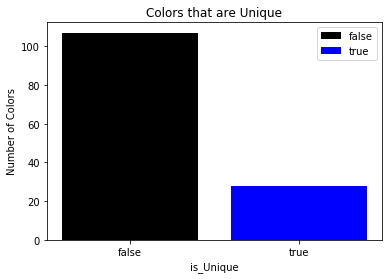

In [25]:
import MySQLdb
import numpy as np
import matplotlib.pyplot as plt

conn = MySQLdb.connect(host="localhost", user="regontu", passwd="*****", db="regontu_db")
cursor = conn.cursor()

cursor.execute("select * from Graph3")

rows =cursor.fetchall()
print(len(rows))

pv=sorted(rows, key=lambda num_part: num_part[1])

true_count = 0
false_count = 0
for element in pv:
    if element[1] is 't':
        true_count =  true_count + 1
    else:
        false_count =  false_count + 1
    
print(true_count, false_count)
bar_width = 0.8
index = [0,1]
bool_values = ["false", "true"]

plt.xticks(index, bool_values)
plt.ylabel("Number of Colors")
plt.xlabel("is_Unique")
plt.title("Colors that are Unique")

plt.bar(index[0], false_count, bar_width, color="Black", label='false')
plt.bar(index[1], true_count, bar_width, color="Blue", label='true')
plt.legend()

plt.show()

66


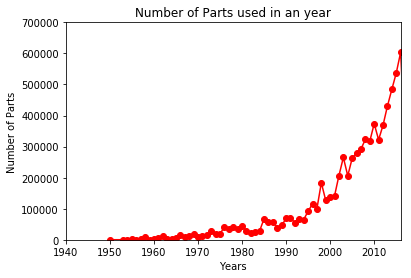

In [20]:
import MySQLdb
import numpy as np
import matplotlib.pyplot as plt

conn = MySQLdb.connect(host="localhost", user="regontu", passwd="*****", db="regontu_db")
cursor = conn.cursor()

cursor.execute("select year,parts_used from Graph1")

rows =cursor.fetchall()
print(len(rows))

pv = sorted(rows, reverse=True, key = lambda parts_used:parts_used[1])
#print("Number of Parts used in an year: ",pv)

years = []
parts_arr = []
pv = sorted(pv, reverse = True)

for row in pv:
    year = row[0]
    parts = row[1]
    years.append(year)
    parts_arr.append(parts)

plt.plot(years, parts_arr, 'ro-')
plt.axis([1940, 2016, 0, 700000])

plt.title('Number of Parts used in an year')
plt.xlabel('Years')
plt.ylabel('Number of Parts')
plt.show()


2060


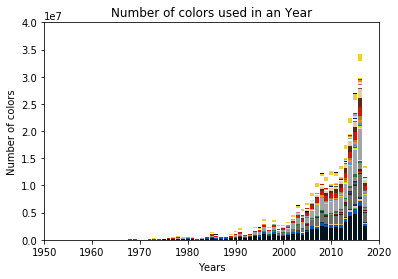

In [3]:
import MySQLdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

conn = MySQLdb.connect(host="localhost", user="regontu", passwd="*****", db="regontu_db")
cursor = conn.cursor()

cursor.execute("select * from Graph")

rows =cursor.fetchall()
print(len(rows))

data=sorted(rows, key=lambda num_part: num_part[1])

#print(data)

num_parts_arr = []
years = []
colors = []
rgb_values = []

for element in data:
    num_parts = element[0]
    year = element[1]
    color = element[2]
    rgb_value = str('#'+ element[3])
    num_parts_arr.append(num_parts)
    years.append(year)
    colors.append(color)
    rgb_values.append(rgb_value)

#print(years)
index = [year for year, _ in enumerate(set(years))]
#print(list(set(years)))

#print(index)

plt.axis([1950,2020,0,40000000])
plt.xscale('linear')
plt.ylabel("Number of colors")
plt.xlabel("Years",labelpad=5)
plt.title("Number of colors used in an Year")

n_rows = len(data)
#print("n_rows = ",n_rows)

bar_width = 0.8
# print(colors)
# print(list(set(colors)))
columns = len(colors)

num_parts_offset=[]
for index in range(len(set(years))):
    #print(index)
    num_parts_offset.append(0)
    #print(colors)
    #print(num_parts_arr)
    #print(rgb_values)
    #print(num_parts_offset)

years_visited = []

for row in range(n_rows):
    if(years[row] not in years_visited):
        num_parts_offset[index] = 0
        years_visited.append(years[row])
    #print(row , colors[row], num_parts_arr[row], rgb_values[row])
    plt.bar(years[row], num_parts_arr[row], bar_width, bottom=num_parts_offset[index], color=rgb_values[row])
    num_parts_offset[index] = num_parts_offset[index] + num_parts_arr[row]
 


    
plt.show()